In [1]:
# project: p6
# submitter: tjones25
# partner: none

In [2]:
from zipfile import ZipFile
from io import TextIOWrapper
import pandas as pd
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import explained_variance_score
from sklearn.base import TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.base import BaseEstimator
from sklearn.base import ClassifierMixin
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import tensor
from matplotlib.animation import FuncAnimation
from IPython.core.display import HTML

# Part 1

In [3]:
#q1

with ZipFile("dataset_diabetes.zip") as zf:
    with zf.open("dataset_diabetes/diabetic_data.csv") as f:
        df = pd.read_csv(f)

encounter_id = df.columns.get_loc('encounter_id')
patient_nbr = df.columns.get_loc('patient_nbr')
train = pd.DataFrame()
test = pd.DataFrame()

train_list = list()
test_list = list()
for index, row in df.iterrows():
    total = 0
    num1 = str(row[patient_nbr])
    num2 = str(row[encounter_id])
    for i in num1:
        total += int(i)
    for i in num2:
        total += int(i)
        
    if total%2 == 0:
        train_list.append(row)
    else:
        test_list.append(row)
        
train = pd.DataFrame(train_list)
test = pd.DataFrame(test_list)
train.columns = df.columns
test.columns = df.columns
        
train.shape, test.shape

((50803, 50), (50963, 50))

In [4]:
#q2

(
    train["time_in_hospital"].mean(),
    test["time_in_hospital"].mean(),
    train["time_in_hospital"].std(), 
    test["time_in_hospital"].std(),
)

(4.401295199102416, 4.390695210250574, 2.984025665505041, 2.9862059667206435)

In [5]:
#q3

{
    "train": dict(train["readmitted"].value_counts()),
    "test": dict(test["readmitted"].value_counts()),
}

{'train': {'NO': 27360, '>30': 17770, '<30': 5673},
 'test': {'NO': 27504, '>30': 17775, '<30': 5684}}

In [6]:
#q4

final = dict()
for index, row in train.iterrows():
    for i in range(train.shape[1]):
        if row[i] == '?':
            try:
                final[train.columns[i]] += 1
            except KeyError:
                final[train.columns[i]] = 1

length = train.shape[0]
final.update((x, (y/length)*100) for x, y in final.items())
final

{'weight': 96.80924354860933,
 'payer_code': 39.25949254965258,
 'diag_2': 0.3444678463870244,
 'diag_3': 1.3955868747908586,
 'medical_specialty': 49.180166525598885,
 'race': 2.2104993799578763,
 'diag_1': 0.023620652323681674}

# Part 2

In [7]:
#q5

admission_source_id = df.columns.get_loc('admission_source_id')
discharge_disposition_id = df.columns.get_loc('discharge_disposition_id')

columns_list = list()
rows_list = list()
for index, row in train.iterrows():
    if (row[admission_source_id] in rows_list) != True:
        rows_list.append(row[admission_source_id])
    if (row[discharge_disposition_id] in columns_list) != True:
        columns_list.append(row[discharge_disposition_id])

blank_full = list()
for i in range(len(rows_list)):
    blank = list()
    for n in range(len(columns_list)):
        blank.append(0)
    blank_full.append(blank)
final_df = pd.DataFrame(blank_full, columns=columns_list, index=rows_list)

for index, row in train.iterrows():
    final_df[row[discharge_disposition_id]][row[admission_source_id]] += 1
    
pd.set_option('max_rows', final_df.shape[0])
pd.set_option('max_columns', final_df.shape[1])
final_df

,25,1,6,5,2,11,3,7,10,4,18,8,14,13,12,17,16,22,23,9,20,15,28,24,19,27
1,133,9356,2029,145,204,117,1526,45,1,79,473,19,32,48,1,0,0,367,76,4,1,21,27,2,0,0
7,154,17042,3402,311,685,566,4128,235,1,250,970,22,100,144,0,0,0,558,101,7,0,6,34,16,4,1
2,0,319,87,9,3,11,30,1,0,8,52,6,0,1,0,0,0,13,2,0,0,0,2,1,0,0
4,5,843,258,28,49,23,87,3,0,11,229,5,2,4,0,0,0,21,5,0,0,0,1,0,0,0
5,1,20,25,7,4,20,277,0,0,5,58,0,2,3,0,0,0,4,6,0,0,0,0,0,0,1
20,0,55,11,1,0,1,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,730,23,44,17,8,189,6,0,64,12,0,0,1,0,0,0,10,3,0,0,0,0,0,0,0
3,0,27,21,2,2,1,5,0,0,0,41,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
17,198,1616,620,68,72,66,700,12,0,4,2,9,31,4,0,9,7,21,8,0,1,0,0,0,0,0
8,0,5,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
#q6

with ZipFile("dataset_diabetes.zip") as zf:
    with zf.open("dataset_diabetes/IDs_mapping.csv") as f:
        data = TextIOWrapper(f).read()
        
parts = data.split("\n,\n")

for p in parts:
    name = p[:p.index(",")] + ".csv"
    with open(name, 'w') as f:
        f.write(p)
        
df = pd.read_csv("discharge_disposition_id.csv")
df.set_index("discharge_disposition_id")
df.set_index("discharge_disposition_id")["description"]
discharge_dict = dict(df.set_index("discharge_disposition_id")["description"])

df = pd.read_csv("admission_source_id.csv")
df.set_index("admission_source_id")
df.set_index("admission_source_id")["description"]
admission_dict = dict(df.set_index("admission_source_id")["description"])

for item in rows_list:
    new = admission_dict[item]
    final_df = final_df.rename(index={item:new})
for item in columns_list:
    new = discharge_dict[item]
    final_df = final_df.rename(columns={item:new})
    
final_df

,Not Mapped,Discharged to home,Discharged/transferred to home with home health service,Discharged/transferred to another type of inpatient care institution,Discharged/transferred to another short term hospital,Expired,Discharged/transferred to SNF,Left AMA,Neonate discharged to another hospital for neonatal aftercare,Discharged/transferred to ICF,NaN,Discharged/transferred to home under care of Home IV provider,Hospice / medical facility,Hospice / home,Still patient or expected to return for outpatient services,Discharged/transferred/referred to this institution for outpatient services,Discharged/transferred/referred another institution for outpatient services,Discharged/transferred to another rehab fac including rehab units of a hospital .,Discharged/transferred to a long term care hospital.,Admitted as an inpatient to this hospital,"Expired in a medical facility. Medicaid only, hospice.",Discharged/transferred within this institution to Medicare approved swing bed,Discharged/transferred/referred to a psychiatric hospital of psychiatric distinct part unit of a hospital,Discharged/transferred to a nursing facility certified under Medicaid but not certified under Medicare.,"Expired at home. Medicaid only, hospice.",Discharged/transferred to a federal health care facility.
Physician Referral,133,9356,2029,145,204,117,1526,45,1,79,473,19,32,48,1,0,0,367,76,4,1,21,27,2,0,0
Emergency Room,154,17042,3402,311,685,566,4128,235,1,250,970,22,100,144,0,0,0,558,101,7,0,6,34,16,4,1
Clinic Referral,0,319,87,9,3,11,30,1,0,8,52,6,0,1,0,0,0,13,2,0,0,0,2,1,0,0
Transfer from a hospital,5,843,258,28,49,23,87,3,0,11,229,5,2,4,0,0,0,21,5,0,0,0,1,0,0,0
Transfer from a Skilled Nursing Facility (SNF),1,20,25,7,4,20,277,0,0,5,58,0,2,3,0,0,0,4,6,0,0,0,0,0,0,1
Not Mapped,0,55,11,1,0,1,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Transfer from another health care facility,0,730,23,44,17,8,189,6,0,64,12,0,0,1,0,0,0,10,3,0,0,0,0,0,0,0
HMO Referral,0,27,21,2,2,1,5,0,0,0,41,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
NaN,198,1616,620,68,72,66,700,12,0,4,2,9,31,4,0,9,7,21,8,0,1,0,0,0,0,0
Court/Law Enforcement,0,5,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


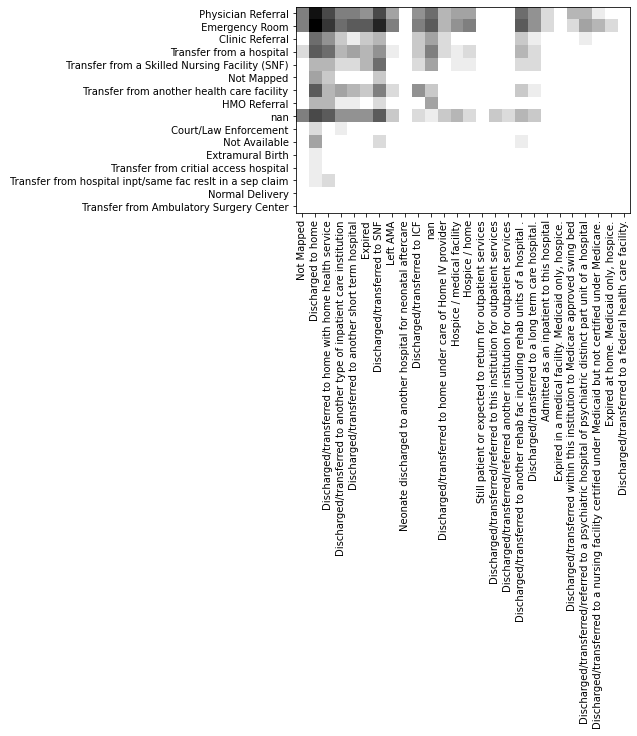

In [9]:
#q7

graph_df = final_df.copy()
for index, row in graph_df.iterrows():
    for i in range(len(row)):
        if row[i] == 0:
            row[i] = 1
        row[i] = np.log2(row[i])

plt.imshow(graph_df, cmap="binary")
plt.xticks(range(graph_df.shape[1]),graph_df.columns, rotation=90)
plt.yticks(range(graph_df.shape[0]),graph_df.index)
plt.show()

# Part 3

{'font12plus': True,
 'transparency': True,
 'x-label': 'visits',
 'y-label': 'days in hospital',
 'spines': False,
 'x-mean': 2.2887866256900424,
 'y-mean': 2.983996296763971,
 'x-std': 1.206208294785741,
 'y-std': 4.401295199102416,
 'slope': 0.03951032525517373,
 'intercept': 4.353637517049942}

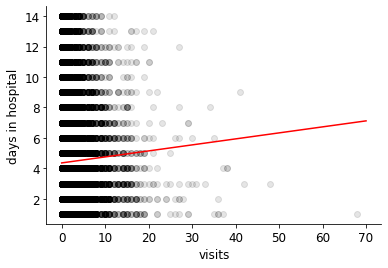

In [10]:
#q8

visits = [0]*test.shape[0]
test["visits"] = visits
for index, row in test.iterrows():
    test.at[index, 'visits'] = row['number_emergency'] + row['number_inpatient'] + row['number_outpatient']

visits = [0]*train.shape[0]
train["visits"] = visits
for index, row in train.iterrows():
    train.at[index, 'visits'] = row['number_emergency'] + row['number_inpatient'] + row['number_outpatient']

x_train = train['visits']
y_train = train['time_in_hospital']

X_train = np.array(train['visits']).reshape(-1, 1) 
Y_train = np.array(train['time_in_hospital']).reshape(-1, 1) 
reg = LinearRegression()
reg.fit(X_train, Y_train)

x = np.linspace(0,70,100)
plt.rcParams.update({'font.size': 12})
fig, ax = plt.subplots()
ax.scatter(x_train, y_train, color="black", alpha=0.1)
ax.plot(x, (reg.coef_[0]*x) + reg.intercept_[0], color='red')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlabel('visits')
plt.ylabel('days in hospital')
    
def check_regression(ax):
    plot = {}
    plot["font12plus"] = min(ax.xaxis.label.get_size(),
                             ax.yaxis.label.get_size(),
                             ax.get_xticklabels()[0].get_size()) >= 12
    plot["transparency"] = ax.collections[0].get_alpha() != None
    plot["x-label"] = ax.get_xlabel().lower()
    plot["y-label"] = ax.get_ylabel().lower()
    plot["spines"] = ax.spines['right'].get_visible() or ax.spines['top'].get_visible()
    plot["x-mean"], plot["y-mean"] = ax.collections[0].get_offsets().data.std(axis=0)
    plot["x-std"], plot["y-std"] = ax.collections[0].get_offsets().data.mean(axis=0)
    plot["slope"] = None
    for line in ax.get_lines():
        x = line.get_xdata()
        y = line.get_ydata()
        for i in range(1, len(x)):
            slope = (y[i]-y[i-1]) / (x[i] - x[i-1])
            intercept = y[i] - x[i] * slope
            if plot["slope"] is None:
                plot["slope"] = slope
                plot["intercept"] = intercept
            elif not (np.isclose(plot["slope"], slope) and 
                      np.isclose(plot["intercept"], intercept)):
                plot["slope"] = None
                plot["intercept"] = None
                break
    return plot

check_regression(ax)

In [11]:
#q9

pred_train = reg.predict(X_train)
X_test = np.array(test['visits']).reshape(-1, 1)
Y_test = np.array(test['time_in_hospital']).reshape(-1, 1)
pred_test = reg.predict(X_test)

train_varience = explained_variance_score(Y_train, pred_train)
test_varience = explained_variance_score(Y_test, pred_test)

(train_varience, test_varience)

(0.0009184071670116367, 0.001087944356748527)

{'font12plus': True,
 'transparency': True,
 'x-label': 'days in hospital',
 'y-label': 'lab procedures done',
 'spines': False,
 'x-mean': 2.983996296763971,
 'y-mean': 19.769919407825235,
 'x-std': 4.401295199102416,
 'y-std': 43.155915989213234,
 'slope': 2.119487878508609,
 'intercept': 33.8274241649776}

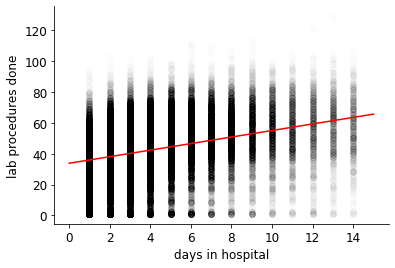

In [12]:
#q10

x_train = train['time_in_hospital']
y_train = train['num_lab_procedures']

X_train = np.array(x_train).reshape(-1, 1) 
Y_train = np.array(y_train).reshape(-1, 1) 
reg = LinearRegression()
reg.fit(X_train, Y_train)

x = np.linspace(0,15,100)
fig, ax = plt.subplots()
ax.scatter(x_train, y_train, color="black", alpha=0.01)
ax.plot(x, (reg.coef_[0]*x) + reg.intercept_[0], color='red')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlabel('days in hospital')
plt.ylabel('lab procedures done')

check_regression(ax)

In [13]:
#q11

pred_train = reg.predict(X_train)
X_test = np.array(test['time_in_hospital']).reshape(-1, 1)
Y_test = np.array(test['num_lab_procedures']).reshape(-1, 1)
pred_test = reg.predict(X_test)

train_varience = explained_variance_score(Y_train, pred_train)
test_varience = explained_variance_score(Y_test, pred_test)

(train_varience, test_varience)

(0.10234075960861977, 0.1004406985134011)

# Part 4

In [14]:
def range_mid(r):
    r = r.strip("[]()")
    return (int(r.split("-")[0])+int(r.split("-")[1]))/2

class DemographicTransformer(TransformerMixin):
    def fit(self, train_df, y=None):
        self.race_columns = ['AfricanAmerican', 'Asian', 'Caucasian', 'Hispanic', 'Other']
        return self

    def transform(self, df1):
        df2 = pd.DataFrame()

        for race in self.race_columns:
            df2[race] = (df1["race"] == race).astype(int)

        for gender in ["Female", "Male"]:
            df2[gender] = (df1["gender"] == gender).astype(int)

        df2["age"] = df1["age"].apply(range_mid)
        self.output_features_ = list(df2.columns)
        return df2

In [15]:
# q12

DemographicTransformer().fit_transform(train).head()

,AfricanAmerican,Asian,Caucasian,Hispanic,Other,Female,Male,age
0,0,0,1,0,0,1,0,5.0
2,1,0,0,0,0,1,0,25.0
3,0,0,1,0,0,0,1,35.0
5,0,0,1,0,0,0,1,55.0
8,0,0,1,0,0,1,0,85.0


In [16]:
#q13

lr = LinearRegression()
pipe = Pipeline([
    ("dem", DemographicTransformer()),
    ("lr", LinearRegression()),
])
y = "time_in_hospital"
pipe.fit(train, train[[y]])

final_string = 'stay = '
#truncate function got frmo https://stackoverflow.com/questions/8595973/truncate-to-three-decimals-in-python/57097311
for i in range(len(pipe["dem"].output_features_)):
    final_string += '%.2f'%(pipe["lr"].coef_[0][i])+'*'+str(pipe["dem"].output_features_[i])+' + '
final_string += '%.2f'%(pipe["lr"].intercept_[0])
final_string

'stay = 0.32*AfricanAmerican + -0.29*Asian + 0.04*Caucasian + -0.14*Hispanic + -0.10*Other + 3.42*Female + 3.28*Male + 0.02*age + -0.45'

In [17]:
#q14

new_train = DemographicTransformer().fit_transform(train)
pred_train = list()
for index, row in new_train.iterrows():
    af = new_train['AfricanAmerican'][index] * pipe["lr"].coef_[0][0]
    a = new_train['Asian'][index] * pipe["lr"].coef_[0][1]
    c = new_train['Caucasian'][index] * pipe["lr"].coef_[0][2]
    h = new_train['Hispanic'][index] * pipe["lr"].coef_[0][3]
    o = new_train['Other'][index] * pipe["lr"].coef_[0][4]
    f = new_train['Female'][index] * pipe["lr"].coef_[0][5]
    m = new_train['Male'][index] * pipe["lr"].coef_[0][6]
    age = new_train['age'][index] * pipe["lr"].coef_[0][7]
    
    y = af+a+c+h+o+f+m+age+pipe["lr"].intercept_[0]
    
    pred_train.append(y)
    
pred_train = np.array(pred_train).reshape(-1,1)

new_test = DemographicTransformer().fit_transform(test)
pred_test = list()
for index, row in new_test.iterrows():
    af = new_test['AfricanAmerican'][index] * pipe["lr"].coef_[0][0]
    a = new_test['Asian'][index] * pipe["lr"].coef_[0][1]
    c = new_test['Caucasian'][index] * pipe["lr"].coef_[0][2]
    h = new_test['Hispanic'][index] * pipe["lr"].coef_[0][3]
    o = new_test['Other'][index] * pipe["lr"].coef_[0][4]
    f = new_test['Female'][index] * pipe["lr"].coef_[0][5]
    m = new_test['Male'][index] * pipe["lr"].coef_[0][6]
    age = new_test['age'][index] * pipe["lr"].coef_[0][7]
    
    y = af+a+c+h+o+f+m+age+pipe["lr"].intercept_[0]
    
    pred_test.append(y)
    
pred_test = np.array(pred_test).reshape(-1,1)

Y_train = np.array(train['time_in_hospital']).reshape(-1, 1)
Y_test = np.array(test['time_in_hospital']).reshape(-1, 1)

train_varience = explained_variance_score(Y_train, pred_train)
test_varience = explained_variance_score(Y_test, pred_test)

(train_varience, test_varience)

(0.014362012823362136, 0.012415699517403067)

# Part 5

In [18]:
train["readmitted"].value_counts()

NO     27360
>30    17770
<30     5673
Name: readmitted, dtype: int64

In [19]:
train["readmit_soon"] = train["readmitted"] == "<30"
test["readmit_soon"] = test["readmitted"] == "<30"

In [20]:
#q15

x = np.array(train['time_in_hospital']).reshape(-1,1)
y = np.array(train['readmit_soon']).reshape(-1,1)

log_reg = LogisticRegression(solver='lbfgs').fit(x, y.ravel())
pred_train = log_reg.predict(x)

log_train = accuracy_score(y, pred_train)

x = np.array(test['time_in_hospital']).reshape(-1,1)
y = np.array(test['readmit_soon']).reshape(-1,1)

pred_test = log_reg.predict(x)

log_test = accuracy_score(y, pred_test)

(log_train, log_test)

(0.8883333661397949, 0.8884681043109707)

In [21]:
#q16

class NaiveEstimator(BaseEstimator, ClassifierMixin):
    def fit(self, X, y):
        if y.sum() / len(y) > 0.5:
            self.prediction = True
        else:
            self.prediction = False

    def predict(self, X):
        return [self.prediction] * len(X)

x = np.array(train['time_in_hospital']).reshape(-1,1)
y = np.array(train['readmit_soon']).reshape(-1,1)
n = NaiveEstimator()
n.fit(x,y)
naive_pred = n.predict(x)

naive_train = accuracy_score(y, naive_pred)

x = np.array(test['time_in_hospital']).reshape(-1,1)
y = np.array(test['readmit_soon']).reshape(-1,1)
n = NaiveEstimator()
n.fit(x,y)
naive_pred = n.predict(x)

naive_test = accuracy_score(y, naive_pred)

(naive_train, naive_test)

(0.8883333661397949, 0.8884681043109707)

In [22]:
#q17

x = np.array(train['time_in_hospital']).reshape(-1,1)
y = np.array(train['readmit_soon']).reshape(-1,1)

log_reg = LogisticRegression(solver='lbfgs').fit(x, y.ravel())
pred_train = log_reg.predict(x)

log_train = balanced_accuracy_score(y, pred_train)

x = np.array(test['time_in_hospital']).reshape(-1,1)
y = np.array(test['readmit_soon']).reshape(-1,1)

pred_test = log_reg.predict(x)

log_test = balanced_accuracy_score(y, pred_test)

(log_train, log_test)

(0.5, 0.5)

In [23]:
#q18

x = np.array(train['time_in_hospital']).reshape(-1,1)
y = np.array(train['readmit_soon']).reshape(-1,1)

log_reg = LogisticRegression(class_weight="balanced", solver='lbfgs').fit(x, y.ravel())
pred_train = log_reg.predict(x)

log_train = balanced_accuracy_score(y, pred_train)

x = np.array(test['time_in_hospital']).reshape(-1,1)
y = np.array(test['readmit_soon']).reshape(-1,1)

pred_test = log_reg.predict(x)

log_test = balanced_accuracy_score(y, pred_test)

(log_train, log_test)

(0.5332863335560872, 0.5292818798995528)

In [24]:
#q19

x = np.array(train[['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 
                    'number_emergency', 'number_inpatient']]).reshape(-1,7)
y = np.array(train['readmit_soon']).reshape(-1,1)

log_reg = LogisticRegression(class_weight="balanced", solver='lbfgs').fit(x, y.ravel())
pred_train = log_reg.predict(x)

log_train = balanced_accuracy_score(y, pred_train)

x = np.array(test[['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 
                    'number_emergency', 'number_inpatient']]).reshape(-1,7)
y = np.array(test['readmit_soon']).reshape(-1,1)

pred_test = log_reg.predict(x)

log_test = balanced_accuracy_score(y, pred_test)

(log_train, log_test)

(0.5930123033331954, 0.5882354971931861)

# Part 6

In [26]:
#q20

# STEP 1
# optimize coef such that the difference between y and
# A@coef is minimized
x = "time_in_hospital"
y = "num_lab_procedures"

A = train[[x]].copy()
A["ones"] = 1
A = tensor(A.values, dtype=float)
b = tensor(train[[y]].values, dtype=float)
coef = tensor([[0], [0]], dtype=float).requires_grad_()

def draw_frame(frame_num):
    learning_rate = 0.01
    for i in range(40*(frame_num+1)):
        predicted = A @ coef
        mse = ((predicted - b) ** 2).mean()
        mse.backward()
        coef.data -= coef.grad * learning_rate
        coef.grad.zero_()
    
    ax.cla()
    train.plot.scatter(x=x, y=y, c="k", alpha=0.01, ax=ax)
    ax.plot(xlim, xlim * coef_np[0] + coef_np[1], color="red")

# STEP 2
# show scatter and fit line based on coef
fig, ax = plt.subplots()
train.plot.scatter(x=x, y=y, c="k", alpha=0.01, ax=ax)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_xlabel("days in hospital")
ax.set_ylabel("lab procedures done")
coef_np = coef.detach().numpy()
xlim = np.array(ax.get_xlim())

anim = FuncAnimation(fig, draw_frame, frames=25, interval=200)
plt.close(fig)
html = anim.to_html5_video()
HTML(html)